In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from Perceptron import Perceptron

In [12]:
def plot_decision_boundary(X, y, perceptron, title):
    """Plot the decision boundary and data points."""
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')
    
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict the function value for the whole grid
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

In [13]:
def accuracy(y_true, y_pred):
    """Calculate accuracy."""
    return np.sum(y_true == y_pred) / len(y_true)

In [14]:
# Generate dataset
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
# Train the perceptron
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)

In [16]:
# Make predictions
train_predictions = p.predict(X_train)
test_predictions = p.predict(X_test)

In [17]:
# Calculate accuracies
train_accuracy = accuracy(y_train, train_predictions)
test_accuracy = accuracy(y_test, test_predictions)

In [18]:
print(f"Perceptron training accuracy: {train_accuracy:.4f}")
print(f"Perceptron test accuracy: {test_accuracy:.4f}")

Perceptron training accuracy: 1.0000
Perceptron test accuracy: 1.0000


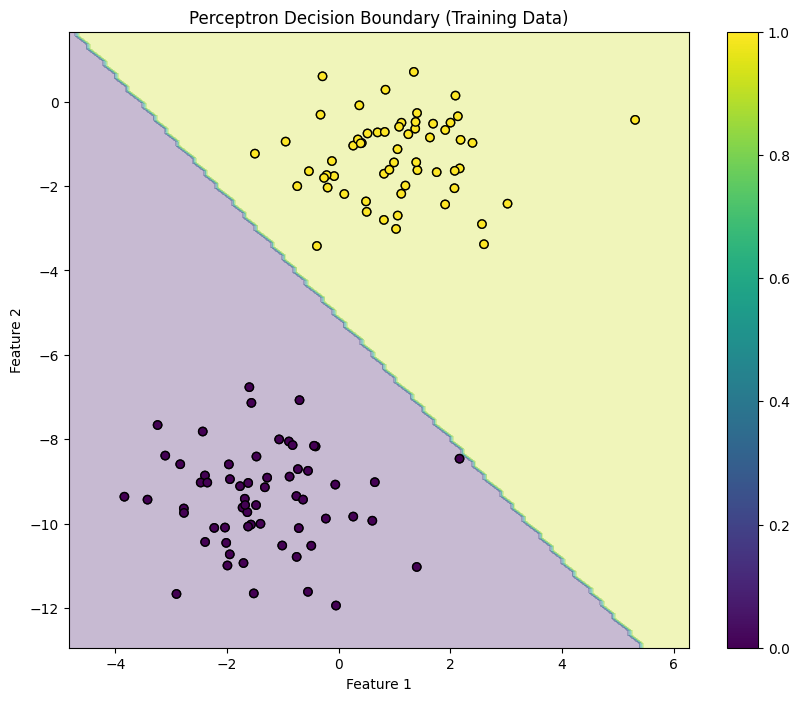

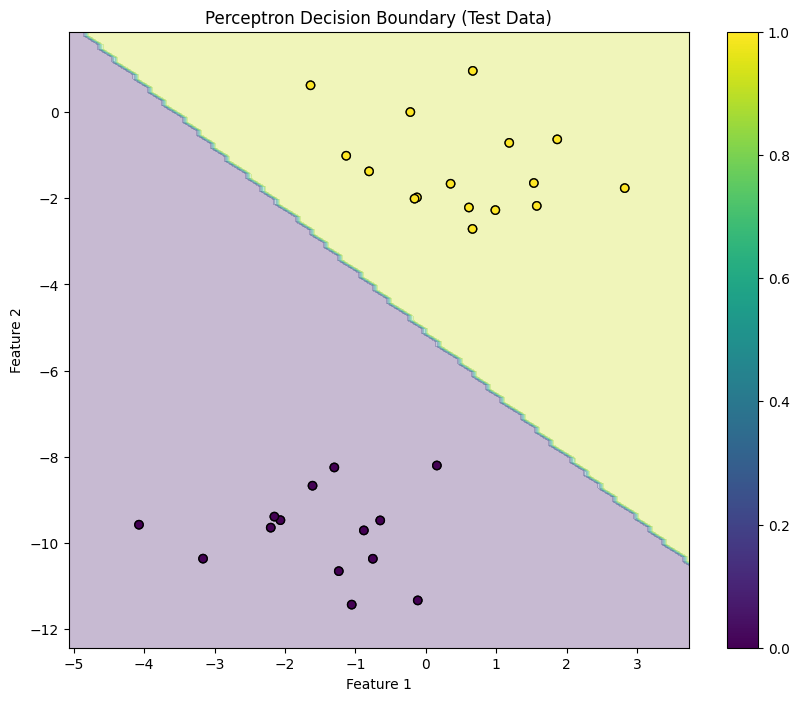

In [19]:
# Plot decision boundaries
plot_decision_boundary(X_train, y_train, p, 'Perceptron Decision Boundary (Training Data)')
plot_decision_boundary(X_test, y_test, p, 'Perceptron Decision Boundary (Test Data)')